In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [135]:
data=pd.read_csv(r"C:\Users\emilb\OneDrive\Desktop\ASSIGNMENT\titanic_dataset.csv")

In [136]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [137]:
data.set_index('PassengerId', inplace=True)

In [138]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [140]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [141]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [142]:
(data.isnull().sum() / len(data)) * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [143]:
data=data.drop('Cabin',axis=1)

In [144]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [145]:
numerical_data=data.select_dtypes(include=["int","float"])

In [146]:
numerical_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

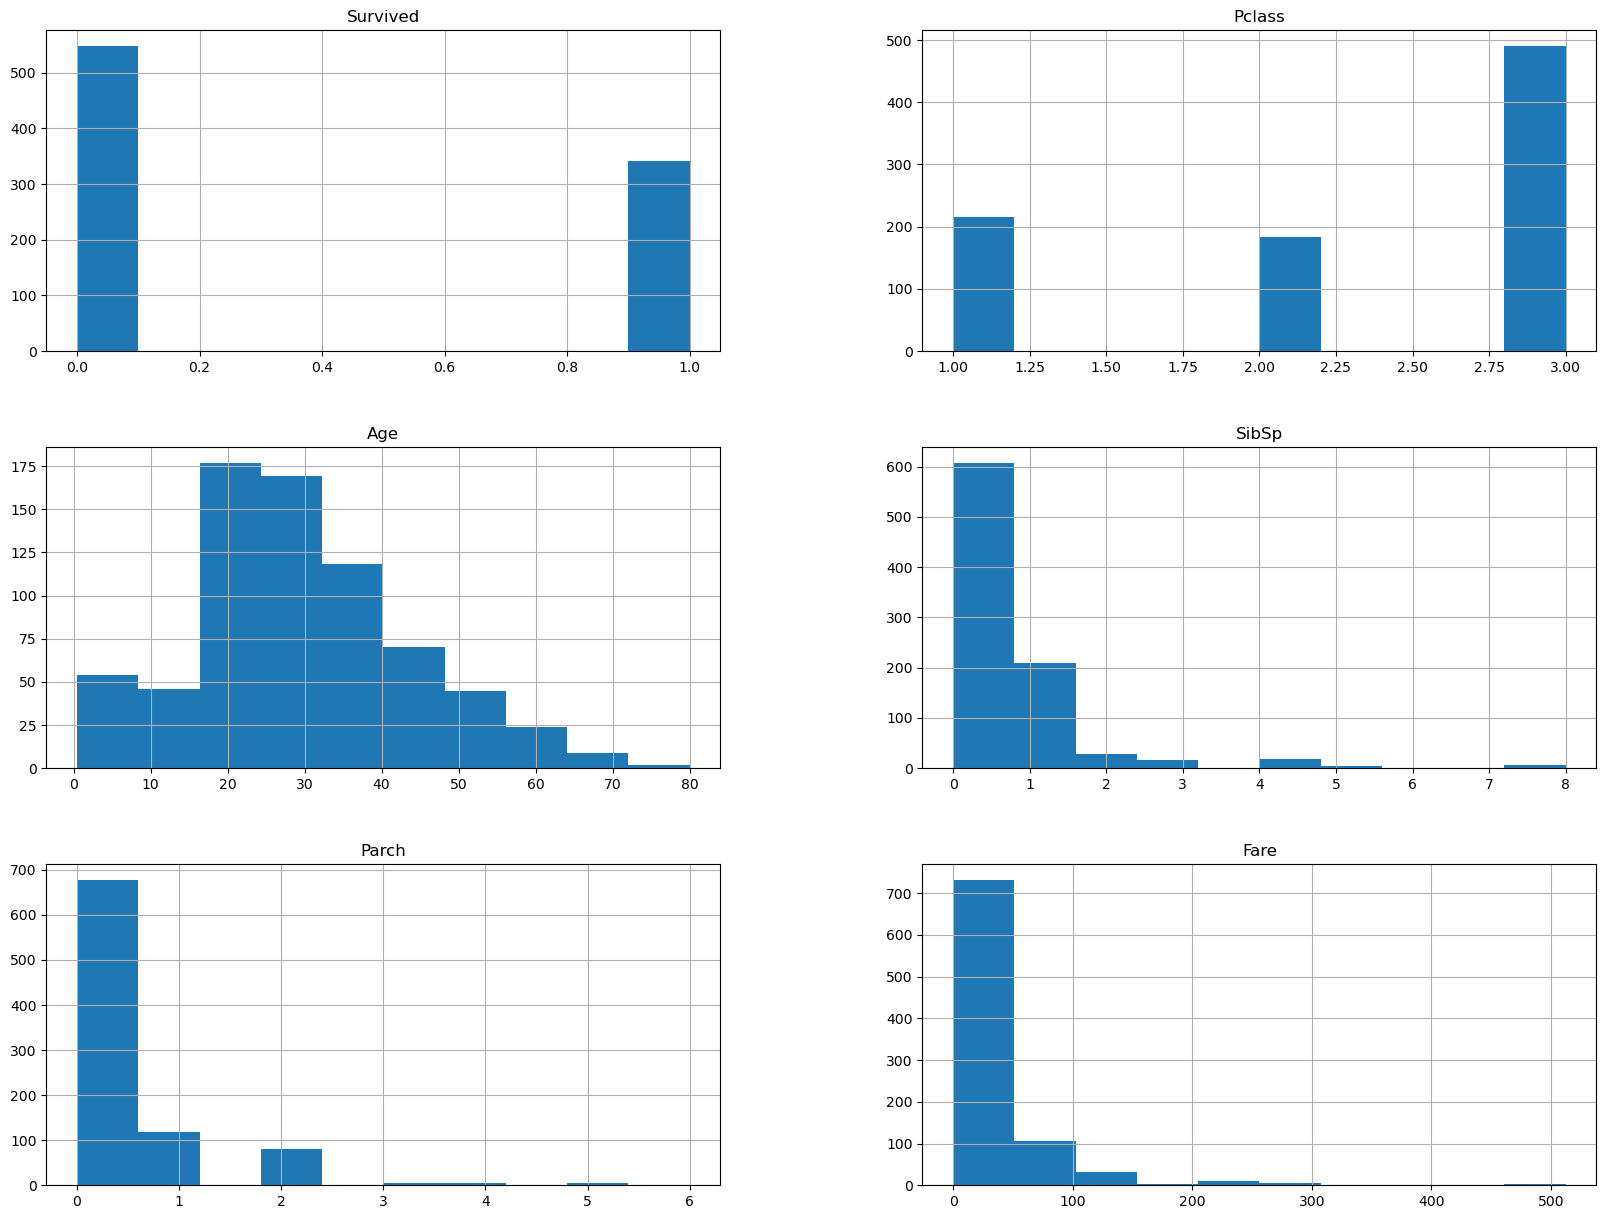

In [147]:
numerical_data.hist(figsize=[20,15])
plt.show()

In [148]:
for i in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
 data[i]=data[i].fillna(data[i].median())

In [149]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [150]:
data['Embarked']=data['Embarked'].fillna(data["Embarked"].mode()[0])

In [151]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

In [161]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

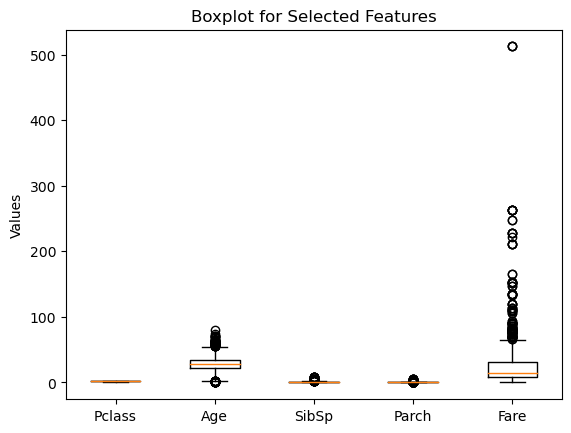

In [153]:
plt.boxplot([data['Pclass'], data['Age'], data['SibSp'], data['Parch'], data['Fare']], 
            labels=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
plt.ylabel('Values')
plt.title('Boxplot for Selected Features')
plt.show()

In [154]:
def remove_outliers_iqr(data, columns):
    for column in columns :
        Q1 = data[column].quantile(0.25)  
        Q3 = data[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
    

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

columns_to_clean = ["Age", "SibSp", "Fare"]

cleaned_data = remove_outliers_iqr(data,columns_to_clean)

cleaned_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [155]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x= cleaned_data[["Age", "SibSp", "Fare","Parch"]]
x_mm=min_max.fit_transform(x)
type(x_mm)
x_mm=pd.DataFrame(x_mm,columns=["Age", "SibSp", "Fare","Parch"])

In [156]:
type(x_mm)

pandas.core.frame.DataFrame

In [157]:
x_mm.head()

,Age,SibSp,Fare,Parch
0,0.271174,0.2,0.111538,0.0
1,0.321438,0.0,0.121923,0.0
2,0.434531,0.2,0.816923,0.0
3,0.434531,0.0,0.123846,0.0
4,0.346569,0.0,0.130128,0.0


In [158]:
cleaned_data=cleaned_data.drop(["Age", "SibSp", "Fare","Parch"],axis=1)

In [159]:
cleaned_data=pd.concat([cleaned_data,x_mm],axis=1)

In [160]:
cleaned_data

,Survived,Pclass,Name,Sex,Ticket,Embarked,Age,SibSp,Fare,Parch
1,0.0,3.0,"Braund, Mr. Owen Harris",male,A/5 21171,S,0.321438,0.0,0.121923,0.000000
3,1.0,3.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,0.434531,0.0,0.123846,0.000000
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,0.346569,0.0,0.130128,0.000000
5,0.0,3.0,"Allen, Mr. William Henry",male,373450,S,0.673285,0.0,0.797885,0.000000
6,0.0,3.0,"Moran, Mr. James",male,330877,Q,0.019854,0.6,0.324231,0.166667
...,...,...,...,...,...,...,...,...,...,...
743,NaN,NaN,NaN,NaN,NaN,NaN,0.635587,0.0,0.408462,0.000000
746,NaN,NaN,NaN,NaN,NaN,NaN,0.509927,0.4,0.217051,0.000000
760,NaN,NaN,NaN,NaN,NaN,NaN,0.183212,0.0,0.111154,0.000000
764,NaN,NaN,NaN,NaN,NaN,NaN,0.308872,0.0,0.400000,0.166667
